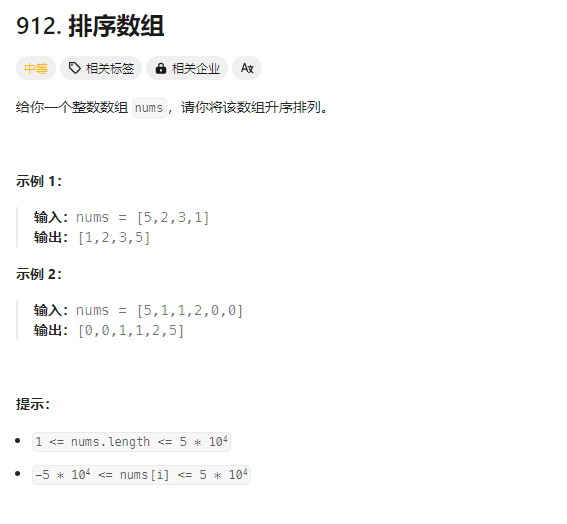

In [40]:
from typing import List
import random

class Solution:
    def sortArray(self, nums: List[int]) -> List[int]:  # 主函数返回列表
        return self.quicksort(nums, len(nums) - 1, 0)

    def quicksort(self, nums, high, low):            # 迭代函数分治策略 使得每次得到哨兵的位置然后分成左右两个小数组
        if high > low:
            pivot_i = self.partition(nums, high, low)
            self.quicksort(nums, pivot_i - 1, low)
            self.quicksort(nums, high, pivot_i + 1)
        return nums

    def partition(self, nums, high, low):           # 负责将哨兵两边的数字变成一边全大一边全小
        # 为了降低运行时间如果是随机选择哨兵而不是固定选择第一个元素为哨兵
        i = random.randint(low,high-1)
        nums[i], nums[low] = nums[low], nums[i]
        pivot = nums[low]
        i = low   # 两边遍历
        j = high
        while j > i:
            while nums[j] >= pivot and j > i:
                 # 没有左右的先后顺序一样其实
                j -= 1
            while nums[i] <= pivot and j > i:
                i += 1
            # 交换两边的异常value
            nums[j], nums[i] = nums[i], nums[j]
        # 最后将哨兵放在正确的位置上
        nums[j], nums[low] = nums[low], nums[j]
        return j
    
a= Solution()
array = [5,2,3,1]
a.sortArray(array)
array

[1, 2, 3, 5]

In [46]:
# 优化快排了

from typing import List
import random

class Solution:
    def sortArray(self, nums: List[int]) -> List[int]:
        def quicksort(l,r):  # 函数里面的函数就不需要使用外函数已有的东西了
            pivot = nums[random.randint(l,r)]
            i, j = l, r
            while i<=j:        # 如果不是 i = j 当下面交换时 i =1 j =3，交换完都为2 了 那么就不能进入循环同时划分为两个左右数组了
                while nums[i] < pivot:  # 只找大的或者小的， 那么保证了最终 找到的为哨兵
                    i += 1
                while nums[j] > pivot:
                    j -=1
                if i<=j:  # 等于是因为当两个会合了意味着找到合适的位置了就能划分左右数组了   这里面没有将随机的哨兵放到最后的位置上是因为已经保证左右的数组都是比哨兵大或者小了
                    nums[i], nums[j] = nums[j], nums[i]   # 找到直接交换同时也能将i,j跳出  或者会合了直接划分左右数组
                    i+=1
                    j-=1
            if i<r: quicksort(i,r)# 因为可能超出 索引所以需要判断一下
            if l<j: quicksort(l,j)
        quicksort(0, len(nums)-1)
        return nums
    
a= Solution()
array = [5,2,3,1]
a.sortArray(array)
array

[1, 2, 3, 5]